In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/Users/khuspreetkaur/Downloads/India GDP 1960-2022.csv")

In [3]:
df.head()

,Unnamed: 0,India GDP - Historical Data,India GDP - Historical Data.1,India GDP - Historical Data.2,India GDP - Historical Data.3
0,NaN,Year,GDP,Per Capita,Growth
1,0.0,2021,"$3,173.40B","$2,277",8.95%
2,1.0,2020,"$2,667.69B","$1,933",-6.60%
3,2.0,2019,"$2,831.55B","$2,072",3.74%
4,3.0,2018,"$2,702.93B","$1,998",6.45%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     62 non-null     float64
 1   India GDP - Historical Data    63 non-null     object 
 2   India GDP - Historical Data.1  63 non-null     object 
 3   India GDP - Historical Data.2  63 non-null     object 
 4   India GDP - Historical Data.3  63 non-null     object 
dtypes: float64(1), object(4)
memory usage: 2.6+ KB


In [5]:
# Checking For Null Values 
df.isnull().sum()

Unnamed: 0                       1
India GDP - Historical Data      0
India GDP - Historical Data.1    0
India GDP - Historical Data.2    0
India GDP - Historical Data.3    0
dtype: int64

In [6]:
# drop the first col named Unnamed: 0
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
# Renaming The Columns
df.rename(columns={
        'India GDP - Historical Data' : 'Year', 
        'India GDP - Historical Data.1' : 'GDP', 
        'India GDP - Historical Data.2' : 'Per Capita', 
        'India GDP - Historical Data.3': 'Growth'   
                  }, inplace=True)

In [8]:
# drop the first row i.e. with index 0 
df.drop([0], axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 1 to 62
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        62 non-null     object
 1   GDP         62 non-null     object
 2   Per Capita  62 non-null     object
 3   Growth      62 non-null     object
dtypes: object(4)
memory usage: 2.1+ KB


In [12]:
df.head()

,Year,GDP,Per Capita,Growth
1,2021,"$3,173.40B","$2,277",8.95%
2,2020,"$2,667.69B","$1,933",-6.60%
3,2019,"$2,831.55B","$2,072",3.74%
4,2018,"$2,702.93B","$1,998",6.45%
5,2017,"$2,651.47B","$1,981",6.80%


In [13]:
df.tail()

,Year,GDP,Per Capita,Growth
57,1965,$59.55B,$119,-2.64%
58,1964,$56.48B,$116,7.45%
59,1963,$48.42B,$101,5.99%
60,1962,$42.16B,$90,2.93%
61,1961,$39.23B,$85,3.72%


In [14]:
# drop the last row 
df.drop([df['Year'].count()], axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 1 to 60
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        60 non-null     object
 1   GDP         60 non-null     object
 2   Per Capita  60 non-null     object
 3   Growth      60 non-null     object
dtypes: object(4)
memory usage: 2.0+ KB


In [15]:
df.tail()

,Year,GDP,Per Capita,Growth
56,1966,$45.87B,$90,-0.06%
57,1965,$59.55B,$119,-2.64%
58,1964,$56.48B,$116,7.45%
59,1963,$48.42B,$101,5.99%
60,1962,$42.16B,$90,2.93%


In [16]:
# reverse the df for better plot visualization 
df = df.reindex(index=df.index[::-1])
df.head()

,Year,GDP,Per Capita,Growth
60,1962,$42.16B,$90,2.93%
59,1963,$48.42B,$101,5.99%
58,1964,$56.48B,$116,7.45%
57,1965,$59.55B,$119,-2.64%
56,1966,$45.87B,$90,-0.06%


In [17]:
# clean data as to plot graphs using matplotlib
years = df['Year'].to_list()
years = list(map(int, years))


def remove_per(str1):
    num = str1.split('%')[0]
    return float(num)

growth = df['Growth'].to_list()
growth = list(map(remove_per, growth))


def cleanGDP(str1):
    str1 = str1.replace('$', '')
    str1 = str1.replace(',', '')
    str1 = str1.replace('B', '')
    num = float(str1)
    return num

gdp = df['GDP'].to_list()
gdp = list(map(cleanGDP, gdp))


per_capita = df['Per Capita'].to_list()
per_capita = list(map(cleanGDP, per_capita))

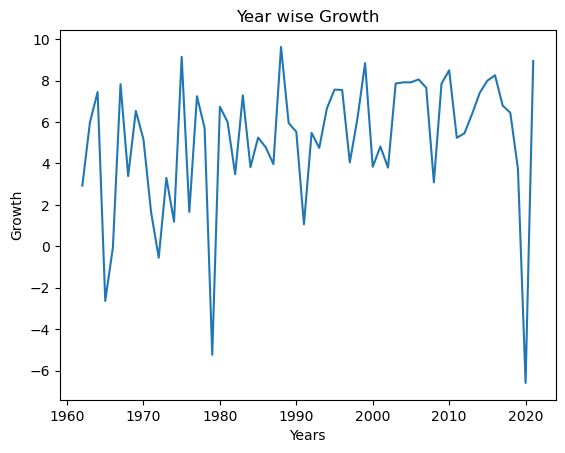

In [18]:
# plot Year wise Growth 
fig, ax = plt.subplots()
ax.plot(years, growth)
plt.xlabel("Years")
plt.ylabel("Growth")
plt.title("Year wise Growth")
plt.show()

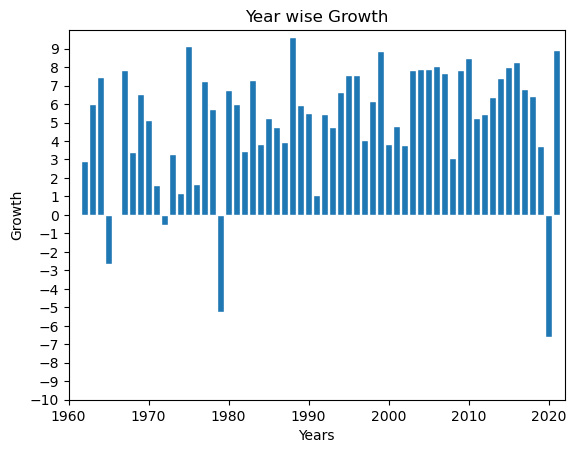

In [19]:
# plot a bar graph for Year wise Growth
fig, ax = plt.subplots()
ax.bar(years, growth, edgecolor="white")
plt.xlabel("Years")
plt.ylabel("Growth")
plt.title("Year wise Growth")
ax.set(xlim=(1960, 2022),
       ylim=(-10, 10), yticks=np.arange(-10,10))
plt.show()

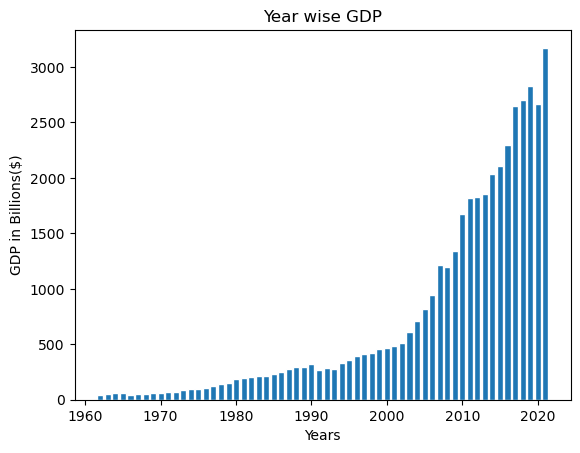

In [20]:
fig, ax = plt.subplots()
ax.bar(years, gdp, edgecolor="white")
plt.xlabel("Years")
plt.ylabel("GDP in Billions($)")
plt.title("Year wise GDP")
plt.show()


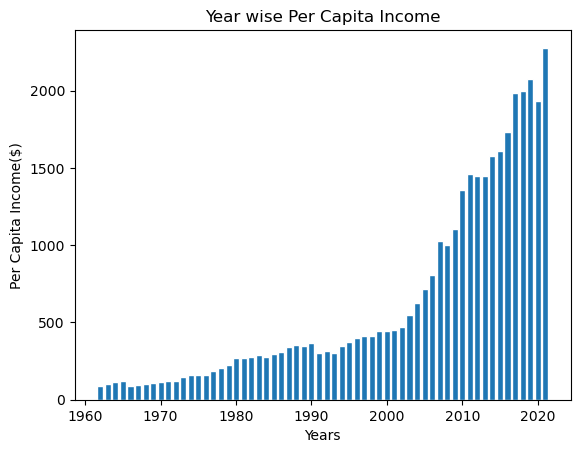

In [21]:
fig, ax = plt.subplots()
ax.bar(years, per_capita, edgecolor="white")
plt.xlabel("Years")
plt.ylabel("Per Capita Income($)")
plt.title("Year wise Per Capita Income")
plt.show()

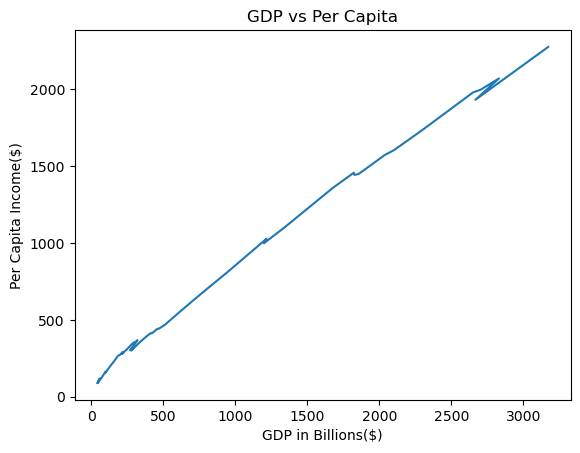

In [22]:
fig, ax = plt.subplots()
ax.plot(gdp, per_capita)
plt.xlabel("GDP in Billions($)")
plt.ylabel("Per Capita Income($)")
plt.title("GDP vs Per Capita")
plt.show()

In [23]:
df['GDP'] = df['GDP'].replace('[\$\,\"B"]', '', regex=True).astype(float)


df['Per Capita'] = df['Per Capita'].replace('[\$\,\.]', '', regex=True).astype(float)


df['Growth'] = df['Growth'].replace('[\%]', '', regex=True).astype(float)
df.head()

,Year,GDP,Per Capita,Growth
60,1962,42.16,90.0,2.93
59,1963,48.42,101.0,5.99
58,1964,56.48,116.0,7.45
57,1965,59.55,119.0,-2.64
56,1966,45.87,90.0,-0.06


In [24]:
df[df['Growth'] == df['Growth'].min()]

,Year,GDP,Per Capita,Growth
2,2020,2667.69,1933.0,-6.6


We can see that the 2020 was the year with lowest growth i.e. -6.6% from 1961. This may be because of the COVID-19 pandamic.

In [25]:
df.sort_values(by=['Growth']).head(3)

,Year,GDP,Per Capita,Growth
2,2020,2667.69,1933.0,-6.60
43,1979,152.99,224.0,-5.24
57,1965,59.55,119.0,-2.64


We can see that 2020, 1979 and 1965 are the top three years with lowest growth. 1965 was India - Pakistan War, 1979 had severe drought gripping most of the country and crude oil prices almost doubling due to Iranian Revolution which caused a disruption of oil supply. Also, India just came out of emergency(9175-1977), 2020 was hit by the COVID 19 pandamic.

In [26]:

df[df['Growth'] == df['Growth'].max()]

,Year,GDP,Per Capita,Growth
34,1988,296.59,354.0,9.63


1988 was the year with highest growth of 9.33%

In [27]:
df.sort_values(by=['Growth'], ascending=False).head(5)

,Year,GDP,Per Capita,Growth
34,1988,296.59,354.0,9.63
47,1975,98.47,158.0,9.15
1,2021,3173.40,2277.0,8.95
23,1999,458.82,442.0,8.85
12,2010,1675.62,1358.0,8.50


1988, 1975, 2021, 1999, 2010 were the top five years with highest growth.

In [28]:
# Year with highest GDP in Indian History
df[df['GDP'] == df['GDP'].max()]

,Year,GDP,Per Capita,Growth
1,2021,3173.4,2277.0,8.95


In [29]:
# Top 5 years with higehst GDP 
df.sort_values(by=['GDP'], ascending=False).head(5)

,Year,GDP,Per Capita,Growth
1,2021,3173.40,2277.0,8.95
3,2019,2831.55,2072.0,3.74
4,2018,2702.93,1998.0,6.45
2,2020,2667.69,1933.0,-6.60
5,2017,2651.47,1981.0,6.80


In [64]:
# Year with highest Per Capita in Indian History
df[df['Per Capita'] == df['Per Capita'].max()]

,Year,GDP,Per Capita,Growth
1,2021,3173.4,2277.0,8.95


The Year 2021 is the year with highest GDP Per Capita Income of $2277

In [65]:
# Top 5 years with higehst Per Capita income 
df.sort_values(by=['Per Capita'], ascending=False).head(5)

,Year,GDP,Per Capita,Growth
1,2021,3173.40,2277.0,8.95
3,2019,2831.55,2072.0,3.74
4,2018,2702.93,1998.0,6.45
5,2017,2651.47,1981.0,6.80
2,2020,2667.69,1933.0,-6.60
